<table>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
          Prepared by Cenk Tüysüz
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Y}{ \mymatrix{cc}{0 & -i \\ i & 0}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

# Simple Qubit Operations using Qiskit

In this notebook we will implement our first Quantum Circuit and investigate properties of Quantum Gates using Qiskit. Let's start by importing the library and make sure it is installed properly.

In [1]:
import qiskit
qiskit.__version__

'0.12.0'

Now, we can start implementing our first circuit.

In [22]:
# import necessary objects from qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

ImportError: cannot import name 'plot_histogram' from 'qiskit' (/home/ctuysuz/anaconda3/envs/quantum/lib/python3.7/site-packages/qiskit/__init__.py)

In [12]:
# Define a quantum circuit with two qubits and two bits

# quantum register with two qubits
qreg =  QuantumRegister(2)   
# classical register with two bits
creg = ClassicalRegister(2) 
 # quantum circuit with quantum and classical registers
qcircuit = QuantumCircuit(qreg,creg)

Now, we are ready to apply Quantum Gates to the qubits.

In [13]:
# Apply an X Gate to the first qubit
qcircuit.x(qreg[0]);

We need to perform a measurement in order to learn to result of our operation.

In [14]:
# This operation will write the measurement result of qubits to correspoding classical registers.
qcircuit.measure(qreg,creg);

Let's have a look at the circuit, we've built, before executing it.

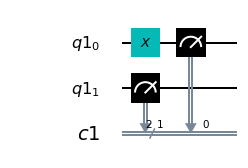

In [15]:
# draw the circuit
qcircuit.draw(output='mpl')

Now, we can execute the circuit to get the result. We will execute the circuits with **shots=1**. This means that the circuit is executed only once. Since we do not expect a probabilistic result, it is totally fine to run it only once. We will talk about ths **shots** parameter in more detail later.

In [17]:
# execute the circuit
job = execute(qcircuit,Aer.get_backend('qasm_simulator'),shots=1)

# print the results
counts = job.result().get_counts(qcircuit)
print(counts)

{'01': 1}


As expected, the first qubit (numbering is from right to left) is flipped and got the value 1, while the second qubit remaind as 0. Also notice that; In qiskit, qubits are initially in $\ket{0}$ state.

The measurement results are stored in the counts dictionary. It stores how many time a certain state is observed. Although, there are many superposition states available through qubits, the result of a measurement can be only 0 or 1. Therefore, for superposition states we might observe a different outcome everytime we execute the circuit. 

Let's investigate a superposition state using the Hadamard Gate. We will setup a similart circuit using only one qubit.

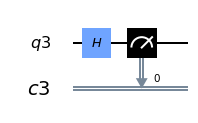

In [20]:
qreg =  QuantumRegister(1)   
creg = ClassicalRegister(1) 
qcircuit = QuantumCircuit(qreg,creg)
qcircuit.h(qreg)
qcircuit.measure(qreg,creg)
qcircuit.draw(output='mpl')

Now, lets choose **shots=100** and observe how many 0's and 1's we will measure. 

In [21]:
job = execute(qcircuit,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qcircuit)
print(counts)

{'1': 45, '0': 55}


The outcome resulted in an almost 50/50 division between 0 and 1. Exact 50/50 division is what we expect from theory:

$$ H \ket{0} = \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} $$

$$ P(0) = \norm{1/\sqrt{2}}^2 = 0.5 $$
$$ P(1) = \norm{1/\sqrt{2}}^2 = 0.5 $$

Why we didn't get exactly 50/50 ratio is related to finite precision and nothing the do with Quantum Computing. Note that this is an ideal simulation where we don't observe any noise effects. You can try to increase the paramter **shots** and observe that the ratio of measurement results approach to 1.

Now, let's try to use the $R_y$ gate and compare the results with theoretical outcome.

Choose $\theta=\pi/3$. Then what we expect as the final state is the following:


$$ R_y(\pi/2) = \mymatrix{cc}{cos(\pi/6) & -sin(\pi/6) \\ sin(\pi/6) & cos(\pi/6)} = \mymatrix{cc}{0.866 & -0.5 \\ 0.5 & 0.866} $$

Then:

$$ R_y(\pi/2)\ket{0} = 0.866\ket{0} + 0.5\ket{1} $$

$$ P(0) = \norm{\sqrt{3}/2}^2 = 0.75 $$

$$ P(1) = \norm{1/2}^2 = 0.25 $$

Let's try to get the same result by using qiskit:

In [24]:
import math
qreg =  QuantumRegister(1)   
creg = ClassicalRegister(1) 
qcircuit = QuantumCircuit(qreg,creg)
qcircuit.Ry(qreg,math.pi/3)
qcircuit.measure(qreg,creg)
job = execute(qcircuit,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qcircuit)
print(counts)

AttributeError: 'QuantumCircuit' object has no attribute 'Ry'

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)